In [71]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob

In [72]:
calibrated_sim = np.load("../../outputs/numpy_arrays/np_output_calibrated_2022-10-05_02-14-55-160843.npy")

In [73]:
calibrated_sim.shape

(51, 2, 2, 6)

In [74]:
n = 5.5
x = []
y = []

n_str = str(n)
while len(n_str) < 3:
    n_str = "0" + n_str

files = sorted(glob(f"../../outputs/numpy_arrays/np_output_calibrated_to_NHIS_{n_str}*"))
x.append(n)
to_avg = []

for f in files:
    arr = np.load(f)
    arr = np.sum(arr, axis=(1,2))
    smoking_percents = np.sum(arr[:,2:4], axis=1) / np.sum(arr[:,0:5], axis=1)
    # smoking_percents = smoking_percents[:10]
    # print(num, smoking_percents)

    to_avg.append(smoking_percents)


to_avg = np.array(to_avg)

In [75]:
adjs = np.mean(to_avg, axis=0)
# adjs = adjs[:20]
adjs

array([0.151316  , 0.14595702, 0.13981313, 0.13063033, 0.12379495,
       0.11664422, 0.11214385, 0.10888889, 0.10613965, 0.10373728,
       0.10181514, 0.09803566, 0.09565381, 0.09401009, 0.09049579,
       0.09081594, 0.08742663, 0.08900012, 0.08837665, 0.08900722,
       0.08731234, 0.08692354, 0.08580941, 0.08637456, 0.08435011,
       0.08542263, 0.08150602, 0.0836966 , 0.08256583, 0.07944457,
       0.07883948, 0.07979029, 0.07954144, 0.07909098, 0.07927718,
       0.07835485, 0.07807819, 0.0774924 , 0.07832153, 0.07763761,
       0.07692771, 0.07829565, 0.07711889, 0.07650071, 0.07442468,
       0.07473047, 0.07403462, 0.0733594 , 0.07087174, 0.07101446,
       0.0696358 ])

In [76]:
target_arr = pd.read_excel("/Users/nick/Documents/Gillings_work/nhis_data/NHIS_state_age_Sep2022.xlsx").to_numpy()
target_arr = target_arr[2::5,3]
target_arr /= 100
target_arr

array([0.1513160774813408, 0.13729302965096327, 0.1343997623978405,
       0.1336313651838806, 0.12339752606221008], dtype=object)

In [77]:
# target_arr = pd.read_excel("/home/nick/Gillings_work/nhis_data/NHIS_smoker_proportions./NHIS_State_age/NHIS_State_age/percent_34_by_year.xlsx").to_numpy()
# target_arr = target_arr[:,1] / 100
# target_arr

In [78]:
# cys = calibrated_sim[:20]
cys = calibrated_sim[:]
cys = np.sum(cys, axis=(1,2))
cys = np.sum(cys[:,2:4], axis=1) / np.sum(cys[:,0:5], axis=1)
cys.shape



(51,)

Text(0, 0.5, 'Smoking percentage')

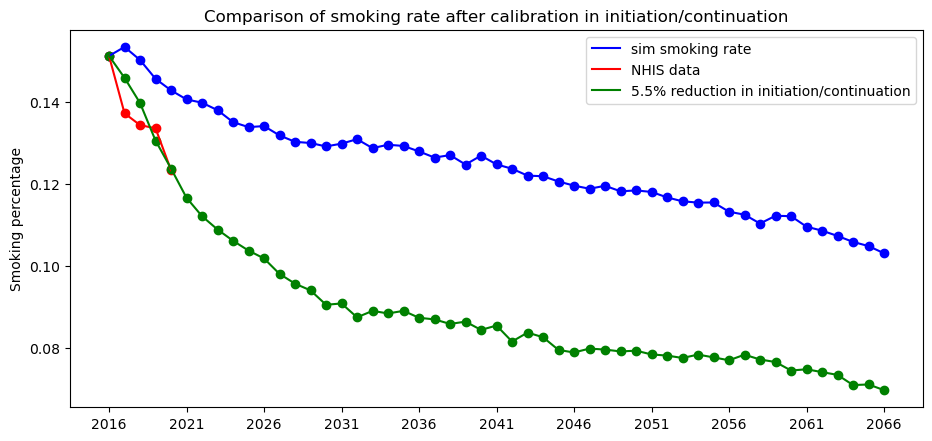

In [79]:
fig, ax = plt.subplots(1,1,figsize=(11,5),dpi=100)
start = 2016
end = 2067
x0 = np.arange(start,end)
x1 = np.arange(2016, 2021)
ax.set_xticks(np.arange(start, end, 5))
ax.plot(x0, cys[:end-start], c='b')
ax.plot(x1, target_arr, c='r')
ax.plot(x0, adjs[:end-start], c='g')
ax.scatter(x0, cys[:end-start], c='b')
ax.scatter(x1, target_arr, c='r')
ax.scatter(x0, adjs[:end-start], c='g')
ax.legend(labels=[
    f"sim smoking rate", 
    "NHIS data",
    f"{str(n)}% reduction in initiation/continuation", 
])
plt.title("Comparison of smoking rate after calibration in initiation/continuation")
ax.set_ylabel("Smoking percentage")

In [80]:
x1

array([2016, 2017, 2018, 2019, 2020])

In [81]:
target_arr

array([0.1513160774813408, 0.13729302965096327, 0.1343997623978405,
       0.1336313651838806, 0.12339752606221008], dtype=object)